## B. Computational Problems

### Problem B.1

#### (a) Load the ${\tt prostate}$ data into R using the faraway package. The prostate data frame has 97 rows and 9 columns. It comes from a study on 97 men with prostate cancer who were due to receive a radical prostatectomy.

In [1]:
library(faraway)
data(prostate)

summary(prostate)


     lcavol           lweight           age             lbph        
 Min.   :-1.3471   Min.   :2.375   Min.   :41.00   Min.   :-1.3863  
 1st Qu.: 0.5128   1st Qu.:3.376   1st Qu.:60.00   1st Qu.:-1.3863  
 Median : 1.4469   Median :3.623   Median :65.00   Median : 0.3001  
 Mean   : 1.3500   Mean   :3.653   Mean   :63.87   Mean   : 0.1004  
 3rd Qu.: 2.1270   3rd Qu.:3.878   3rd Qu.:68.00   3rd Qu.: 1.5581  
 Max.   : 3.8210   Max.   :6.108   Max.   :79.00   Max.   : 2.3263  
      svi              lcp             gleason          pgg45       
 Min.   :0.0000   Min.   :-1.3863   Min.   :6.000   Min.   :  0.00  
 1st Qu.:0.0000   1st Qu.:-1.3863   1st Qu.:6.000   1st Qu.:  0.00  
 Median :0.0000   Median :-0.7985   Median :7.000   Median : 15.00  
 Mean   :0.2165   Mean   :-0.1794   Mean   :6.753   Mean   : 24.38  
 3rd Qu.:0.0000   3rd Qu.: 1.1786   3rd Qu.:7.000   3rd Qu.: 40.00  
 Max.   :1.0000   Max.   : 2.9042   Max.   :9.000   Max.   :100.00  
      lpsa        
 Min.   :-0.430

#### (b) Conduct MLR with lpsa as the response and all of the other variables as predictors. Compute the 90% and 95% confidence intervals for the parameter associated with the age variable. Using these intervals, what could we have deduced about the p-value for age in the regression summary. 

In [2]:
lmod = lm(lpsa ~ ., data = prostate)
summary(lmod)

#90% confidence

confint(lmod,4, level = 0.90)

#95% confidence

confint(lmod,4, level = 0.95)



Call:
lm(formula = lpsa ~ ., data = prostate)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7331 -0.3713 -0.0170  0.4141  1.6381 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.669337   1.296387   0.516  0.60693    
lcavol       0.587022   0.087920   6.677 2.11e-09 ***
lweight      0.454467   0.170012   2.673  0.00896 ** 
age         -0.019637   0.011173  -1.758  0.08229 .  
lbph         0.107054   0.058449   1.832  0.07040 .  
svi          0.766157   0.244309   3.136  0.00233 ** 
lcp         -0.105474   0.091013  -1.159  0.24964    
gleason      0.045142   0.157465   0.287  0.77503    
pgg45        0.004525   0.004421   1.024  0.30886    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.7084 on 88 degrees of freedom
Multiple R-squared:  0.6548,	Adjusted R-squared:  0.6234 
F-statistic: 20.86 on 8 and 88 DF,  p-value: < 2.2e-16


,5 %,95 %
age,-0.0382102,-0.001064151


,2.5 %,97.5 %
age,-0.04184062,0.002566267


#### Note, the P-value for the age variable is 0.08229. This is greater than 0.05. We can conclude that age variable is not a significant predictor for Ipsa.

#### (c) In class, we discussed a reason why conducting several individual hypothesis tests (e.g., t-tests for regression parameters) is problematic. It turns out that computing individual confidence intervals has a similar issue. Instead, we might compute a "joint confidence region" for several parameters.  Compute and display the 95% joint confidence region for the parameters associated with age and lbph. Plot the origin on this display. The location of the origin on the display tells us the outcome of certain hypothesis test. State the test and its outcome. 

The ellipse package and corresponding function should help here. Use the code below (and help files) as a guide.


Attaching package: 'ellipse'

The following object is masked from 'package:graphics':

    pairs



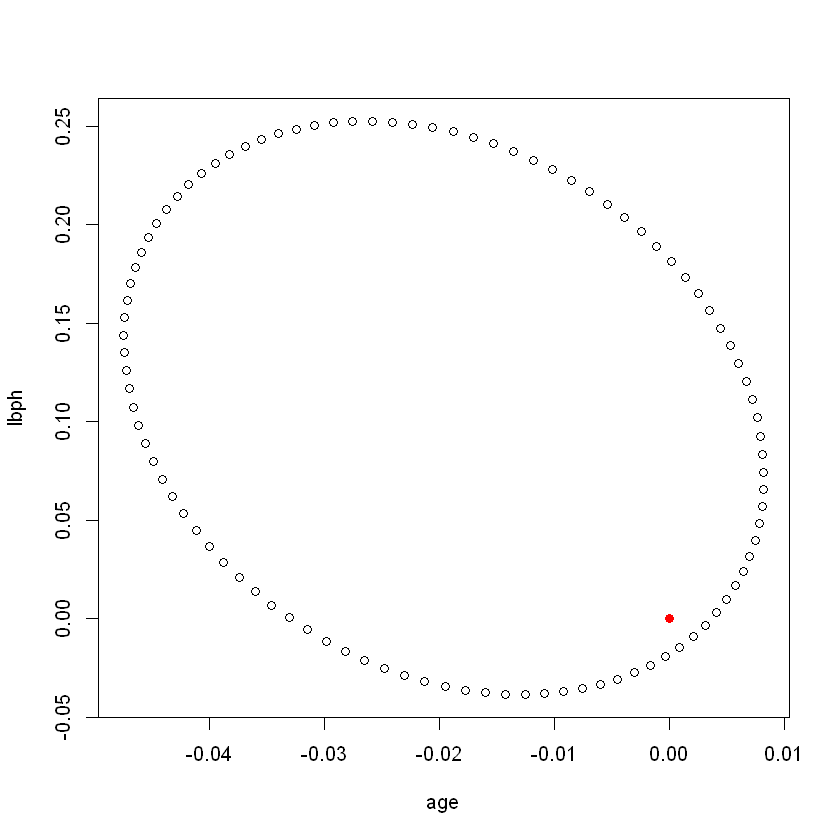

In [3]:
#install.packages("ellipse")
library(ellipse)

plot(ellipse(lmod,c(4,5),type = "l",level=0.95))

points(0,0,col="red",pch=19)

#### H0:age=0 and lbph=0. Note, since the origin zero is inside the joint confidence region for age and ibph, we cannot reject the null hypothesis which indicates that both age and ibph are zero.

#### (d) Remove all predictors that are not significant at the $\alpha = 0.05$ level. Test this model against the original model. Which model is preferred?

In [4]:
lmod.1 = lm(lpsa ~ lcavol + lweight + svi  , data = prostate)

anova(lmod.1,lmod)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
93,47.78486,NA,NA,NA,NA
88,44.16302,5,3.621837,1.443387,0.2167334


#### Based on the above test, we can see that the p-value is greater than 0.05. That tells us that the null hypothesis which states that the reduced model is better. Based on the P-value, we cannot reject the null-hypothesis. 

### Problem B.2

This [link](https://www.colorado.edu/amath/sites/default/files/attached-files/advertising.txt) contains advertising data. This dataset contains, in thousands of dollars, TV, Radio, and Newspaper budgets for 200 different markets along with the Sales, in thousands of units, for each market.

#### (a) Load the dataset using the link above and split the data into a training set and a test set, as done in the previous homework. (Remove the variable X.)

In [5]:
advert = read.table("https://www.colorado.edu/amath/sites/default/files/attached-files/advertising.txt")
str(advert)

## Testing set 20% of data

sample <- sample(1:nrow(advert), size = 0.20*nrow(advert), replace = F)

test <- advert[sample, ]

## Training set 80% of data

train  <- advert[-sample, ]

nrow(train)
nrow(test)

'data.frame':	200 obs. of  4 variables:
 $ TV       : num  230.1 44.5 17.2 151.5 180.8 ...
 $ radio    : num  37.8 39.3 45.9 41.3 10.8 48.9 32.8 19.6 2.1 2.6 ...
 $ newspaper: num  69.2 45.1 69.3 58.5 58.4 75 23.5 11.6 1 21.2 ...
 $ sales    : num  22.1 10.4 9.3 18.5 12.9 7.2 11.8 13.2 4.8 10.6 ...


[1] 160

[1] 40

#### (b) Fit the full MLR model. Which variables are statistically significant at the 5% level? Discuss the difference between statistical and practical significance in this context. Also, the estimate for newspaper is negative. Do you actually think that sales *suffer* as a result of newspaper advertising?

In [6]:
lmod.2 = lm(sales ~ ., data = train)
summary(lmod.2)


Call:
lm(formula = sales ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5538 -0.6662  0.2710  1.2711  2.6578 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.052337   0.346440   8.811 2.28e-15 ***
TV           0.046745   0.001598  29.244  < 2e-16 ***
radio        0.178867   0.009821  18.212  < 2e-16 ***
newspaper   -0.001654   0.006806  -0.243    0.808    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.717 on 156 degrees of freedom
Multiple R-squared:  0.8956,	Adjusted R-squared:  0.8936 
F-statistic: 445.9 on 3 and 156 DF,  p-value: < 2.2e-16


#### TV and Radio variable are significant at the 5% level. Statistical significance means that we can say that the parameters TV and Radio are statistically significant since their p-values are lower than 0.05. 

#### Practical Significance means that if we increase 1 unit of TV keeping other parameters in the model constant, the average increase in the sales will increase by 0.045 units. Also, if we increase 1 unit of Radio keeping other parameters in the model constant the average increase in the sales will increase by 0.183 units.

#### No, i do not thing that sales actually suffer as a result of newspaper advertising. Any sort of advertising should potentially cause a positive effect on sales, it does not make sense for sales to decrease if it is advertised in newspaper. If we increase the data, this coefficient might change to positive.

#### (c) Imagine that, in your test set, you don't have any response measurements. Compute predictions--including 95% *prediction* intervals--of sales for all measurements in your test set. Print the prediction MSE and the first five prediction intervals.

In [7]:
#Compute predictions

a = predict(lmod.2, newdata = data.frame(test), type = "response")

#95% prediction intervals

b = predict(lmod.2, newdata = data.frame(test), interval="predict")

#First five prediction intervals

b[1:5,]

#Prediction MSE

mean((test$sales - predict.lm(lmod.2, newdata = data.frame(test))) ^ 2)

,fit,lwr,upr
200,15.42566,11.99485,18.85646
103,17.92137,14.48213,21.36060
138,20.91687,17.47498,24.35876
132,15.89662,12.43966,19.35359
54,19.75448,16.32064,23.18831


[1] 2.565522

#### (d) Add some polynomial terms to the model. Specifically, add $TV^2$ and $radio^2$ to the model. To do this, you'll need to use the I() function: I(predictor^2). Comment on the significance of these terms. Assume $\alpha = 0.05$.

In [8]:
lmod.3 = lm(sales ~ . + I(TV^2) + I(radio^2) , data = train)
summary(lmod.3)


Call:
lm(formula = sales ~ . + I(TV^2) + I(radio^2), data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.1635 -0.8660  0.0199  1.1273  3.4277 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.543e+00  4.886e-01   3.159  0.00191 ** 
TV           7.931e-02  5.882e-03  13.484  < 2e-16 ***
radio        1.586e-01  3.298e-02   4.810 3.57e-06 ***
newspaper    1.157e-03  6.247e-03   0.185  0.85327    
I(TV^2)     -1.150e-04  2.017e-05  -5.705 5.80e-08 ***
I(radio^2)   5.572e-04  6.705e-04   0.831  0.40723    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.567 on 154 degrees of freedom
Multiple R-squared:  0.9141,	Adjusted R-squared:  0.9113 
F-statistic: 327.8 on 5 and 154 DF,  p-value: < 2.2e-16


#### $TV^2$ is very significant when compared to alpha value of 0.05 but $radio^2$ is not significant when compared to alpha value of 0.05.

#### (e) Is it surprising that $R^2$ increased from the model in (c) to the model in (d)? Explain why or why not.

#### No it is not surprising that $R^2$ increased from the model in (c) to the model in (d). This is because it a multiple linear regression model, the line of best fit is unable to capture the patterns in the data as it is not passing through most of the points. This is an example of underfitting situation. To overcome under-fitting, we need to increase the complexity of the model. When we add quadratic terms into the model, now the line passes through more points. In other words, the quadratic curve is able to fit the data better than the linear line. Hence, this increases our $R^2$. 

#### (f) Conduct a test (not just individual t-tests) to decide whether you should keep the quadratic terms in your model.

In [9]:
anova(lmod.2,lmod.3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
156,459.7666,NA,NA,NA,NA
154,378.1386,2,81.62807,16.62185,2.908982e-07


#### We added some polynomial terms into our lmod.3 and we note that lmod.2 is our reduced model. Based on the above test, the p-values is very low and is definately lower that 0.05. We can reject the null hypothesis which states that we should keep the reduced model. 

#### (g) Redo part (c) for the model with the quadratic terms. How do the predicted MSEs compare?

In [10]:
#Compute predictions

a = predict(lmod.3, newdata = data.frame(test), type = "response")

#95% prediction intervals

b = predict(lmod.3, newdata = data.frame(test), interval="predict")

#First five prediction intervals

b[1:5,]

#Prediction MSE

mean((test$sales - predict.lm(lmod.3, newdata = data.frame(test))) ^ 2)

,fit,lwr,upr
200,15.17024,12.03687,18.30362
103,16.41882,13.23699,19.60066
138,19.75211,16.57822,22.92600
132,15.00110,11.81329,18.18890
54,20.77518,17.60553,23.94483


[1] 1.805171

#### The predicted MSE decreased when compared to the model in part (c). This is clearly because this model (lmod.3) is a better model than lmod.2